## The concentration of the drug in the body (simplified model)

- Equation: $\frac{dc}{dt}= \frac{-c(t)}{\tau}$
- Numerical solution: $c(t)={e^\frac{-t}{\tau}}$
- $c(t)$ - concentration of the drug in time $t$

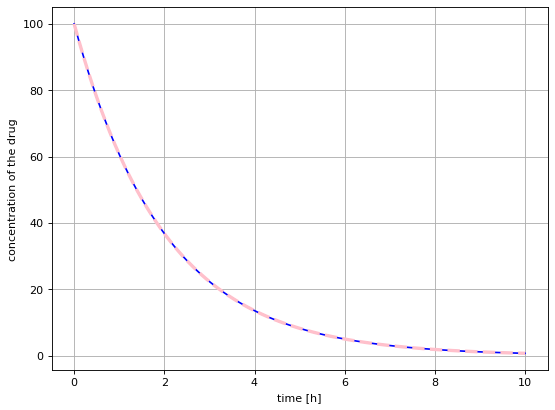

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def dcdt(c, t, tau):
    return -c/tau
tpoc, tkraj= 0, 10 # time
vreme=np.linspace(tpoc,tkraj,100)
c0=100
tau=2
#numerical solution
Cnum=integrate.odeint(dcdt,c0,vreme, args=(tau,))
#analitical solution
Can= c0*np.exp(-vreme/tau)

fig=plt.figure(figsize=(8,6), dpi=80)
plt.plot(vreme,Cnum,color='blue',linewidth=1.5,linestyle='-')
plt.plot(vreme, Can, color='pink', linewidth=3, linestyle='--')
plt.xlabel('time [h]')
plt.ylabel('concentration of the drug')
plt.grid()
plt.show()

#### Model

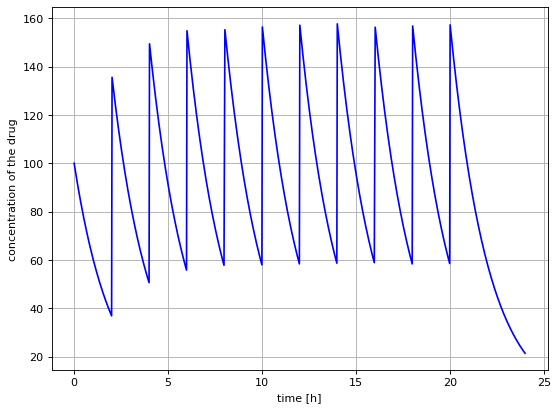

In [21]:
def heaviside(x):
    return 0.5*(np.sign(x)+1)

import numpy as np
tpoc, tkraj = 0, 24
vreme=np.linspace(tpoc,tkraj,1000)
c0,tau=100,2
conc=c0*np.exp(-vreme/tau)
for i in range(10):
    conc+=heaviside(vreme-(i+1)*tau)*c0*np.exp(-(vreme-(i+1)*tau)/tau)
plt.figure(figsize=(8,6), dpi=80)
plt.plot(vreme,conc,color='blue',linewidth=1.5,linestyle='-')
plt.xlabel('time [h]')
plt.ylabel('concentration of the drug')
plt.grid()
plt.show()

## Simplified colony of bacteria model

- Initial number of bacteria in colony: $N=1000$
- Reproduction rate of bacteria per hour: $r=0.8$
- Simple model: $ \frac{dN}{dt} = rN $
- Numerical soluttion: $N(t)=Ne^{rt}$

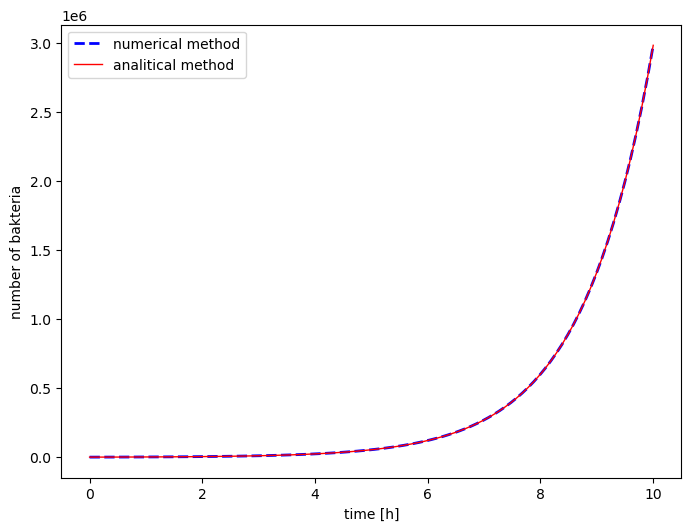

In [19]:
def dNdt(N, t):
    return 0.8*N

from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

tpoc, tkraj = 0, 10
vreme=np.linspace(tpoc,tkraj,100) #poslednji broj oznacava broj tacaka iz datog intervala
N0=1000
NodT=integrate.odeint(dNdt,N0,vreme) #resavanje dif jna prvog reda
#analitcko res
Nanalit=N0*np.exp(0.8*vreme)

fig=plt.figure(figsize=(8,6),dpi=100)
plt.plot(vreme, NodT, label='numerical method',color='blue',linewidth=2, linestyle='--')
plt.plot(vreme, Nanalit, label='analitical method',color='red',linewidth=1, linestyle='-')
plt.xlabel('time [h]')
plt.ylabel('number of bakteria')
plt.legend()
fig.savefig('bacteria colony.png')